In [ ]:
!pip install transformers

     |████████████████████████████████| 1.5MB 10.4MB/s 
     |████████████████████████████████| 2.9MB 52.8MB/s 
     |████████████████████████████████| 890kB 56.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=b0dcc6b9877a80473b11682db577fe533e63aa8effc377a1e609d7bada4967ab
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import numpy as np
import pandas as pd
import json

In [ ]:
import torch
from transformers import BertModel, BertTokenizer, BertConfig, BertForMaskedLM, BertForSequenceClassification

In [ ]:
#bert=BertModel.from_pretrained("bert-base-chinese")

In [ ]:
tokenizer=BertTokenizer.from_pretrained("bert-base-chinese")

In [ ]:
dict = {              #自定义BertConfig
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.15, #提高dropout
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "type_vocab_size": 2,
  "vocab_size": 21128
}

with open("config.json",'w') as file_obj:
  json.dump(dict,file_obj)

In [ ]:
model_config=BertConfig.from_json_file("config.json")

In [ ]:
model_config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.15,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "type_vocab_size": 2,
  "vocab_size": 21128
}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/data_sampled_20000.csv'

In [ ]:
def label_to_category(label):   #将标签转化为编号
  if label == '词':
    return 0
  elif label == '诗':
    return 1
  elif label == '文言文':
    return 2
  elif label == '新闻':
    return 3
  elif label == '期刊':
    return 4
  else:
    print("标签格式存在异常")

In [ ]:
def get_data(file_path):#获取数据集的文本和标签信息
    data = pd.read_csv(file_path)
    
    #ci = data[data.类别=='词'].sample(n=20000,random_state=10, axis=0)
    #poem = data[data.类别=='诗'].sample(n=20000,random_state=12, axis=0)
    #wyw = data[data.类别=='文言文'].sample(n=20000,random_state=15, axis=0)
    #news = data[data.类别=='新闻'].sample(n=20000,random_state=16, axis=0)
    #journal = data[data.类别=='期刊'].sample(n=20000,random_state=18, axis=0)
    #print(len(ci),len(poem),len(wyw),len(news),len(journal))
    
    #temp = pd.concat([ci,poem,wyw,news,journal])
    #temp = temp[['文本','类别']]
    #temp.to_csv('/content/drive/My Drive/data_sampled_20000.csv')
    
    content = data['文本']
    labels = np.asarray([label_to_category(label) for label in data['类别']])
    return content, labels
 
content,labels=get_data(path)

In [ ]:
content

0                              休 说 季 伦 锦 帐 ， 山 南 岸 、 更 花 密
1                              抛 家 傍 路 ， 思 量 却 是 ， 无 情 有 思
2                                                拥 衾 思 旧 约
3                                            芙 蓉 无 处 著 秋 光
4                                            浓 绿 阴 中 人 买 酒
                               ...                        
99995    因 为 拥 有 儿 子 的 老 年 人 一 方 面 可 以 从 儿 子 那 里 得 到 经 ...
99996    家 庭 农 场 发 展 初 期 拥 有 的 资 源 较 少 ， 农 场 主 的 经 验 相 ...
99997    此 外 ， 由 于 内 地 生 具 有 多 元 群 体 资 格 ， 他 们 往 往 会 以 ...
99998    由 于 宗 族 规 范 强 ，  家 族 成 员 间 在 借 钱 等 方 面 借 人 情 容...
99999    在 政 府 监 督 、 管 理 下 ，  政 府 要 积 极 引 导 民 间 资 本 、 社...
Name: 文本, Length: 100000, dtype: object

In [ ]:
data=[]

In [ ]:
for sentence in content:
  sentence = sentence[:128]
  data.append(tokenizer.encode(sentence)) #将句子转换为BERT预训练模型中的id
del content

In [ ]:
data[:5]

[[101,
  828,
  6432,
  2108,
  840,
  7239,
  2362,
  8024,
  2255,
  1298,
  2279,
  510,
  3291,
  5709,
  2166,
  102],
 [101,
  2837,
  2157,
  988,
  6662,
  8024,
  2590,
  7030,
  1316,
  3221,
  8024,
  3187,
  2658,
  3300,
  2590,
  102],
 [101, 2881, 6143, 2590, 3191, 5276, 102],
 [101, 5696, 5900, 3187, 1905, 5865, 4904, 1045, 102],
 [101, 3849, 5344, 7346, 704, 782, 743, 6983, 102]]

In [ ]:
import keras
X_padded=keras.preprocessing.sequence.pad_sequences(data,maxlen=128, dtype="long", truncating="post", padding="post") #对齐句子
del data

In [ ]:
X_padded[:5]

array([[ 101,  828, 6432, 2108,  840, 7239, 2362, 8024, 2255, 1298, 2279,
         510, 3291, 5709, 2166,  102,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [ 101, 2837, 2157,  988, 6662, 8024, 2590, 7030, 1316, 3221, 8024,
        3187, 2658, 3300, 2590,  102,    0,    0,    0,    0,

In [ ]:
from sklearn.model_selection import train_test_split
#X_padded = np.load('/content/drive/My Drive/X_padded_bert.npy')
X_train, X_test, y_train, y_test = train_test_split(X_padded, labels, test_size=0.4, random_state=21) #训练集、验证集、测试集比例为6:2:2
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=21)
del X_padded

In [ ]:
print(len(X_train),len(X_val),len(X_test))

60000 20000 20000


In [ ]:
def get_masks(data): #BERT的MASK
  attention_masks = []
  for seq in data:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)
  return attention_masks

In [ ]:
train_masks = get_masks(X_train)

In [ ]:
val_masks = get_masks(X_val)

In [ ]:
test_masks = get_masks(X_test)

In [ ]:
import torch.utils.data as Data
 
x_train_tensor = torch.LongTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
del X_train, y_train
x_val_tensor = torch.LongTensor(X_val)
y_val_tensor = torch.LongTensor(y_val)
del X_val, y_val
x_test_tensor = torch.LongTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)
del X_test ,y_test
 
train_masks = torch.LongTensor(train_masks)
val_masks = torch.LongTensor(val_masks)
test_masks = torch.LongTensor(test_masks)
 
train_data = Data.TensorDataset(x_train_tensor, train_masks, y_train_tensor) # 将数据放入 torch_dataset
del x_train_tensor, train_masks, y_train_tensor
val_data = Data.TensorDataset(x_val_tensor, val_masks, y_val_tensor)
del x_val_tensor, val_masks, y_val_tensor
test_data = Data.TensorDataset(x_test_tensor, test_masks, y_test_tensor)
del x_test_tensor, test_masks, y_test_tensor 
 
BATCH_SIZE = 64                     # BATCH_SIZE为64
train_loader=Data.DataLoader(
        dataset=train_data,            # 将数据放入loader
        batch_size=BATCH_SIZE,          
        shuffle=True                # 是否打乱数据的排布
        )
del train_data
val_loader=Data.DataLoader(
        dataset=val_data,             # 将数据放入loader
        batch_size=BATCH_SIZE,           
        shuffle=True                # 是否打乱数据的排布
        )
del val_data
test_loader=Data.DataLoader(
        dataset=test_data,             # 将数据放入loader
        batch_size=BATCH_SIZE,         
        shuffle=True                # 是否打乱数据的排布
        )
del test_data

In [ ]:
def go(loader): #测试loader是否正常
  for step, (x,y,z) in enumerate(loader):
    print(z)
    break
go(train_loader)
go(val_loader)
go(test_loader)

tensor([0, 4, 3, 3, 2, 4, 0, 0, 0, 4, 2, 4, 3, 3, 4, 0, 1, 3, 0, 2, 0, 0, 3, 0,
        0, 0, 3, 1, 0, 1, 1, 4, 0, 3, 2, 0, 0, 0, 3, 3, 1, 3, 3, 0, 1, 4, 3, 3,
        1, 1, 1, 4, 4, 0, 4, 4, 3, 4, 3, 4, 0, 2, 0, 2])
tensor([2, 1, 0, 1, 2, 1, 3, 0, 0, 3, 4, 4, 1, 0, 0, 0, 1, 3, 1, 4, 3, 3, 0, 2,
        4, 4, 4, 1, 2, 2, 4, 3, 3, 0, 3, 0, 2, 3, 1, 4, 4, 1, 3, 4, 0, 1, 0, 0,
        2, 4, 3, 1, 1, 0, 0, 4, 1, 0, 3, 1, 0, 3, 0, 3])
tensor([4, 2, 4, 2, 1, 1, 2, 3, 0, 0, 1, 3, 2, 3, 4, 1, 4, 1, 4, 2, 0, 0, 3, 2,
        1, 4, 3, 2, 1, 4, 4, 4, 1, 4, 0, 0, 4, 1, 1, 4, 2, 4, 2, 4, 1, 1, 3, 2,
        3, 0, 1, 0, 3, 1, 2, 0, 1, 0, 0, 2, 4, 0, 3, 3])


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
from transformers import BertForSequenceClassification, BertPreTrainedModel
from transformers.modeling_outputs import SequenceClassifierOutput #

class BertForMultiClassSequenceClassification(BertPreTrainedModel): #重写BertForSequenceClassification类
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = 5 #分为5类（源码里默认是2类）

    #以下都是源码，未改动
        self.bert = BertModel(config)
        self.dropout = torch.nn.Dropout(0.2) #增加Dropout
        self.classifier = torch.nn.Linear(config.hidden_size, 5) #全连接层
 
        self.init_weights()

 
    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        token_type_ids=None,
        position_ids=None,
        head_mask=None,
        inputs_embeds=None,
        labels=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None
    ):
        """
        labels (:obj:`torch.LongTensor` of shape :obj:`(batch_size,)`, `optional`):
            Labels for computing the sequence classification/regression loss. Indices should be in :obj:`[0, ...,
            config.num_labels - 1]`. If :obj:`config.num_labels == 1` a regression loss is computed (Mean-Square loss),
            If :obj:`config.num_labels > 1` a classification loss is computed (Cross-Entropy).
        """
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict
 
        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
 
        pooled_output = outputs[1]
 
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        #print(logits)
 
        loss = None
        if labels is not None:
            if self.num_labels == 1:
                #  We are doing regression
                loss_fct = MSELoss()
                loss = loss_fct(logits.view(-1), labels.view(-1))
            else:
                loss_fct = torch.nn.CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
 
        if not return_dict:
            output = (logits,) + outputs[2:]
            return ((loss,) + output) if loss is not None else output
 
        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )

In [ ]:
model = BertForMultiClassSequenceClassification(model_config) #Bert模型
model.to(device)

BertForMultiClassSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(21128, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.15, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-

In [ ]:
def save_metrics(save_path, train_loss_list, valid_loss_list, train_acc_list, valid_acc_list, global_steps_list):  #记录loss和accuracy在训练与验证过程中的变化情况，以便后续评价模型

    if save_path == None:
        return
    
    state_dict = {'train_loss_list': train_loss_list,
            'valid_loss_list': valid_loss_list,
            'train_acc_list': train_acc_list,
            'valid_acc_list': valid_acc_list,
            'global_steps_list': global_steps_list}
    
    torch.save(state_dict, save_path)
    print('Loss and accuracy saved')


def load_metrics(load_path):    #读取训练过程

    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print('Loss and accuracy loaded')
    
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['train_acc_list'],  state_dict['valid_acc_list'], state_dict['global_steps_list']

In [ ]:
from transformers import AdamW #AdamW优化器
param_optimizer = list(model.named_parameters())
 
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
     {'params': [p for n, p in param_optimizer],
     'weight_decay_rate': 0.01}                                
]
'''{'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
''' 
optimizer = AdamW(optimizer_grouped_parameters,lr=2e-5,weight_decay=0.01) #学习率为0.00002

In [ ]:
def flat_accuracy(preds, labels):  #计算准确率
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
 
train_loss_set = []
num_epochs = 10 #训练10轮
eval_every = len(train_loader) // 2   
running_loss = 0.0
running_acc = 0.0
valid_running_loss = 0.0
valid_running_acc = 0.0
global_step = 0
train_loss_list = []
valid_loss_list = []
train_acc_list = []
valid_acc_list = []
global_steps_list = []
 
for i in range(num_epochs): # 模型训练
    print("Epoch:",i+1)
    model.train()
    tr_loss, tr_accuracy = 0, 0
    nb_tr_steps, nb_tr_examples = 0, 0
    for step, batch in enumerate(train_loader):
        batch = tuple(t.to(device) for t in batch) #使用GPU
        b_input_ids, b_input_mask, b_labels = batch
        #print(b_input_ids.size(),b_labels.size())
        optimizer.zero_grad()
        loss, logits = model(b_input_ids ,attention_mask=b_input_mask, labels=b_labels)[:2]
 
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        accuracy = flat_accuracy(logits, label_ids)
 
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        running_acc += accuracy
        global_step += 1

        # 用验证集验证
        if global_step % eval_every == 0:
          model.eval()
          with torch.no_grad():
            # validation loop
            for st, batch in enumerate(val_loader):
                batch = tuple(t.to(device) for t in batch)
                b_input_ids, b_input_mask, b_labels = batch
                loss, logits = model(b_input_ids ,attention_mask=b_input_mask, labels=b_labels)[:2]
 
                logits = logits.detach().cpu().numpy()
                label_ids = b_labels.to('cpu').numpy()
                accuracy = flat_accuracy(logits, label_ids)
 
                valid_running_loss += loss.item()
                valid_running_acc += accuracy
 
          # 评估
          average_train_loss = running_loss / eval_every
          average_train_acc = running_acc / eval_every
          average_valid_loss = valid_running_loss / len(val_loader)
          average_valid_acc = valid_running_acc / len(val_loader)
          train_loss_list.append(average_train_loss)
          valid_loss_list.append(average_valid_loss)
          train_acc_list.append(average_train_acc)
          valid_acc_list.append(average_valid_acc)
          global_steps_list.append(global_step)
 
          # 重置running_loss和running_acc
          running_loss = 0.0     
          running_acc = 0.0           
          valid_running_loss = 0.0
          valid_running_acc = 0.0
          model.train()
 
          # 输出训练进度
          print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Valid Loss: {:.4f}, Valid Acc: {:.4f}'
             .format(i+1, num_epochs, global_step, num_epochs*len(train_loader), average_train_loss, average_train_acc, average_valid_loss,average_valid_acc))
          
          
save_metrics('/bert_metrics.pt', train_loss_list, valid_loss_list, train_acc_list, valid_acc_list, global_steps_list) #保存训练过程
print('Finished Training!')

Epoch: 1
Epoch [1/10], Step [469/9380], Train Loss: 0.7602, Train Acc: 0.6883, Valid Loss: 0.4935, Valid Acc: 0.8275
Epoch [1/10], Step [938/9380], Train Loss: 0.4820, Train Acc: 0.8365, Valid Loss: 0.4233, Valid Acc: 0.8586
Epoch: 2
Epoch [2/10], Step [1407/9380], Train Loss: 0.4116, Train Acc: 0.8601, Valid Loss: 0.3937, Valid Acc: 0.8685
Epoch [2/10], Step [1876/9380], Train Loss: 0.3821, Train Acc: 0.8734, Valid Loss: 0.3908, Valid Acc: 0.8686
Epoch: 3
Epoch [3/10], Step [2345/9380], Train Loss: 0.3407, Train Acc: 0.8864, Valid Loss: 0.3458, Valid Acc: 0.8829
Epoch [3/10], Step [2814/9380], Train Loss: 0.3543, Train Acc: 0.8824, Valid Loss: 0.3576, Valid Acc: 0.8789
Epoch: 4
Epoch [4/10], Step [3283/9380], Train Loss: 0.3121, Train Acc: 0.8966, Valid Loss: 0.3415, Valid Acc: 0.8845
Epoch [4/10], Step [3752/9380], Train Loss: 0.3098, Train Acc: 0.8965, Valid Loss: 0.3489, Valid Acc: 0.8855
Epoch: 5
Epoch [5/10], Step [4221/9380], Train Loss: 0.2870, Train Acc: 0.9054, Valid Loss: 0.

In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/bert_model.pth')  #保存模型的参数

Loss and accuracy loaded


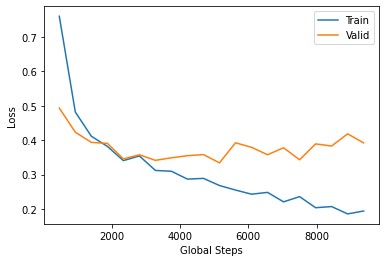

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
 
# 可视化训练过程

train_loss_list, valid_loss_list, train_acc_list, valid_acc_list, global_steps_list = load_metrics('/bert_metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

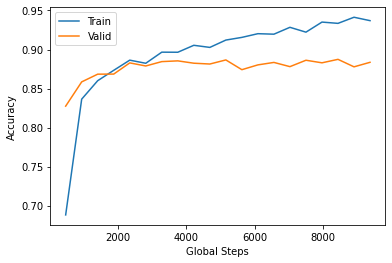

In [ ]:
plt.plot(global_steps_list, train_acc_list, label='Train')
plt.plot(global_steps_list, valid_acc_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

In [ ]:
def evaluate(model, test_loader, version='title', threshold=0.5): # 用测试集评价模型效果
 
    y_pred = []
    y_true = []
 
    model.eval()
    with torch.no_grad():
      for st, batch in enumerate(test_loader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        output = model(b_input_ids ,attention_mask=b_input_mask, labels=b_labels)[1]
        #output = (output > threshold).int()
        output=np.asarray(output.cpu())
        output=np.argmax(output,1)
        #print(output)
        y_pred.extend(output.tolist())
        y_true.extend(b_labels.tolist())
    print('Classification Report:')
    print(classification_report(y_true, y_pred, target_names=['词','诗','文言文','新闻','期刊'], digits=4))
    %matplotlib inline
    cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4])
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
 
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
 
    ax.xaxis.set_ticklabels(['ci','poem','wyw','news','journal'])
    ax.yaxis.set_ticklabels(['ci','poem','wyw','news','journal'])

Classification Report:
              precision    recall  f1-score   support

           词     0.9212    0.8375    0.8773      4104
           诗     0.8722    0.9533    0.9109      3980
         文言文     0.8319    0.8762    0.8535      3982
          新闻     0.8960    0.8978    0.8969      3952
          期刊     0.9275    0.8769    0.9015      3982

    accuracy                         0.8880     20000
   macro avg     0.8897    0.8883    0.8880     20000
weighted avg     0.8899    0.8880    0.8879     20000



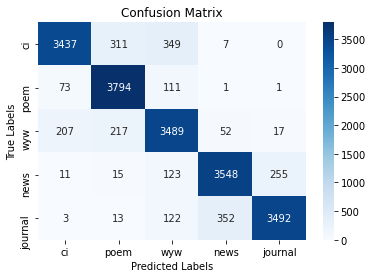

In [ ]:
evaluate(model, test_loader)

In [ ]:
def category_to_label(num): #由编号转化为标签
  if num == 0:
    return '词'
  elif num == 1:
    return '诗'
  elif num == 2:
    return '文言文'
  elif num == 3:
    return '新闻'
  elif num == 4:
    return '期刊'
  else:
    print("类型格式存在异常")

In [ ]:
model = BertForMultiClassSequenceClassification(model_config).to('cuda')
model.load_state_dict(torch.load('/content/drive/My Drive/bert_model.pth')) #加载模型


def get_category(model):  #预测新文本
  sentence = input('请输入句子：')

  tokenizer=BertTokenizer.from_pretrained("bert-base-chinese")
  ids = [tokenizer.encode(sentence)]
  
  import keras
  ids = keras.preprocessing.sequence.pad_sequences(ids, maxlen=128, dtype="long", truncating="post", padding="post") #对齐句子

  mask = get_masks(ids)
  mask = torch.LongTensor(mask).to('cuda')
  
  ids = torch.LongTensor(ids).to('cuda')
  print(ids)

  model.eval()
  with torch.no_grad():
    pred = model(ids, attention_mask=mask).logits
    print(pred)
    pred = np.asarray(pred.cpu())
    pred = np.argmax(pred,1)[0]
    #print(pred)    
    print('属于',category_to_label(pred),'的文本')

get_category(model)

请输入句子：《1844年经济学哲学手稿》用劳动实践解释了私有财产的产生与消亡，解释了人的异化和异化的扬弃，解释了自然界作为实践结果的演化与发展。
tensor([[  101,   517, 10116,  8159,  2399,  5307,  3845,  2110,  1528,  2110,
          2797,  4943,   518,  4500,  1227,  1220,  2141,  6664,  6237,  7025,
           749,  4900,  3300,  6568,   772,  4638,   772,  4495,   680,  3867,
           767,  8024,  6237,  7025,   749,   782,  4638,  2460,  1265,  1469,
          2460,  1265,  4638,  2813,  2461,  8024,  6237,  7025,   749,  5632,
          4197,  4518,   868,   711,  2141,  6664,  5310,  3362,  4638,  4028,
          1265,   680,  1355,  2245,   511,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0, 